In [1]:
import fitz  # PyMuPDF
import re
import spacy
import pymupdf
from sklearn.feature_extraction.text import TfidfVectorizer
import string
import pdfplumber


In [2]:
nlp = spacy.load('en_core_web_lg')
pdf_path= 'C:/Users/marni/Desktop/AI_Project/practice-standard-project-risk-management.pdf'

In [3]:


def extract_text_pdfplumber(pdf_path):
    text = ""
    try:
        # Open the PDF
        pdf_document = fitz.open(pdf_path)
        
        # Iterate through the pages
        for page_num in range(13, 118):  # Customize the page range as per your needs
            page = pdf_document.load_page(page_num)  # Get a page
            text += page.get_text("text")  # Extract text from the page, format: "text"
        
        pdf_document.close()  # Close the document after extraction
    except Exception as e:
        print(f"Error reading the PDF file: {e}")
    
    return text

# Example usage with spaCy
doc = nlp(extract_text_pdfplumber(pdf_path))


In [4]:
def extract_sections(text):
    sections = []
    # Regex pattern to capture the section formats specified
    section_pattern = re.compile(r'^\s*([A-Z]?\d+(\.\d+)*|[A-Z]\.\d+(\.\d+)*)\s+.*$')

    # Split the text into lines
    lines = text.split('\n')
    lines.append("D.6.1.7 stop_tokens")
    # Iterate through each line, capturing the line and its index
    for idx, line in enumerate(lines):
        # Check if the line matches the section pattern
        if section_pattern.match(line):
            # Append a tuple of (index, section)
            sections.append((idx, line.strip()))  # Append the index and matched line

    return sections

In [5]:
text = extract_text_pdfplumber(pdf_path)  # Use your pdfplumber extraction function


# Extract sections
extracted_sections = extract_sections(text)
print(extracted_sections)  # Display the extracted sections

[(4, '1.1 Purpose of the Practice Standard for Project Risk Management'), (66, '1.2 Project Risk Management Deﬁ nition'), (79, '1.3 Role of Project Risk Management in Project Management'), (124, '1.4 Good Risk Management Practice'), (157, '1.5 Critical Success Factors for Project Risk Management'), (194, '1.6 Conclusion'), (204, '2.1 Introduction'), (211, '2.2 Deﬁ nition of Project Risk'), (241, '2.3 Individual Risks and Overall Project Risk'), (256, '2.4 Stakeholder Risk Attitudes'), (277, '2.5 Iterative Process'), (291, '2.6 Communication'), (307, '2.7 Responsibility for Project Risk Management'), (318, '2.8 Project Manager’s Role for Project Risk Management'), (358, '3.1 Project Risk Management and Project Management'), (393, '3.2 Project Risk Management Processes'), (525, '4.1 Purpose and Objectives of the Plan Risk Management Process'), (609, '4.2 Critical Success Factors for the Plan Risk Management Process'), (614, '4.2.1 Identify and Address Barriers to Successful Project Risk 

In [6]:
lines = text.split('\n')
lines[4:66]

[' 1.1 Purpose of the Practice Standard for Project Risk Management ',
 ' The purpose of the  Practice Standard for Project Risk Management  is to ( a  ) provide a standard for project ',
 'management practitioners and other stakeholders that deﬁ nes the aspects of Project Risk Management that ',
 'are recognized as good practice on most projects most of the time and ( b  ) provide a standard that is globally ',
 'applicable and consistently applied. This practice standard has a descriptive purpose rather than one used for ',
 'training or educational purposes. ',
 ' The  Practice Standard for Project Risk Management  covers risk management as it is applied to single ',
 'projects only. Like the  PMBOK  ®  Guide  – Fourth Edition, this practice standard does not cover risk in programs ',
 'or portfolios of projects. ',
 ' Chapter 11 of the  PMBOK  ®  Guide –  Fourth Edition, is the basis for the  Practice Standard for Project Risk ',
 'Management . This practice standard is consistent 

In [7]:
import pandas as pd
data_frame_of_sections = pd.DataFrame()
section=[]
ids=[]
for i in range(len (extracted_sections)):
    section.append(extracted_sections[i][1])
    ids.append(extracted_sections[i][0])
data_frame_of_sections['sections'] = section
data_frame_of_sections['ids'] = ids
data_frame_of_sections.head()


,sections,ids
0,1.1 Purpose of the Practice Standard for Proje...,4
1,1.2 Project Risk Management Deﬁ nition,66
2,1.3 Role of Project Risk Management in Project...,79
3,1.4 Good Risk Management Practice,124
4,1.5 Critical Success Factors for Project Risk ...,157


In [8]:
def extract_paragraph__(text,start_idx,end_edx):
    lines = text.split('\n')
    paragraph=lines[start_idx+1:end_edx]
    combined_string = ' '.join(paragraph)
    return combined_string

In [9]:
extract_paragraph__(text,4076,4079)

' Monitor and Control Risks provides the assurance that risk responses are being applied, veriﬁ es whether  they are effective and as necessary initiates corrective actions. '

In [15]:
def extract_paragraphs_to_dataframe(df, text):
    """
    Extracts paragraphs between consecutive section IDs in the DataFrame and injects the results.
    
    :param df: A DataFrame containing section IDs.
    :param text: The complete text as a string.
    :return: The updated DataFrame with extracted paragraphs.
    """
    paragraphs = []  # List to store extracted paragraphs

    # Iterate through the DataFrame rows to extract paragraphs
    for i in range(len(df) - 1):
        start_id = df.loc[i, 'ids']  # Current ID
        end_id = df.loc[i + 1, 'ids']  # Next ID
        print(start_id,end_id)
        # Extract the paragraph between the two IDs
        paragraph = extract_paragraph__(text, start_id, end_id)
        if paragraph=="":
            paragraph= "no_paragraph"
        paragraphs.append(paragraph)  # Append extracted paragraph to the list

    # Add the extracted paragraphs to a new column in the DataFrame
    # Fill with None or empty string for the last ID
    paragraphs.append("no_paragraph")  # Append empty string for the last ID

    df['paragraphs'] = paragraphs  # Create new column 'paragraphs'

    return df

In [16]:
df=extract_paragraphs_to_dataframe(data_frame_of_sections, text)
df.head()
data_frame_of_sections.to_csv('DataSet.csv', index=False)

4 66
66 79
79 124
124 157
157 194
194 204
204 211
211 241
241 256
256 277
277 291
291 307
307 318
318 358
358 393
393 525
525 609
609 614
614 637
637 647
647 656
656 657
657 674
674 679
679 719
719 733
733 736
736 747
747 752
752 756
756 759
759 761
761 765
765 770
770 779
779 785
785 792
792 800
800 806
806 811
811 837
837 847
847 867
867 880
880 907
907 916
916 921
921 926
926 935
935 943
943 948
948 952
952 963
963 979
979 994
994 1051
1051 1059
1059 1064
1064 1070
1070 1074
1074 1078
1078 1090
1090 1098
1098 1102
1102 1106
1106 1110
1110 1116
1116 1124
1124 1144
1144 1150
1150 1156
1156 1177
1177 1215
1215 1220
1220 1230
1230 1239
1239 1243
1243 1249
1249 1268
1268 1281
1281 1285
1285 1292
1292 1303
1303 1307
1307 1310
1310 1314
1314 1318
1318 1330
1330 1347
1347 1352
1352 1360
1360 1364
1364 1388
1388 1392
1392 1397
1397 1402
1402 1416
1416 1486
1486 1489
1489 1500
1500 1505
1505 1517
1517 1521
1521 1533
1533 1538
1538 1541
1541 1545
1545 1576
1576 1625
1625 1673
1673 1679
1679 16

--------------------------------------------------------------end--------------------------------------------


In [56]:
def extract_paragraph(text,start_idx,end_edx):
    lines = text.split('\n')
    
    id_start,C_start = start_idx.split("_")
    id_end,C_end = end_edx.split("_")
    
    element1 = text_tokens.index(id_start)
    element2 = text_tokens.index(id_end)
    if text_tokens[element1+1] !="" and text_tokens[element2+1] !="":
        if f'{text_tokens[element1]}'+'_'+f'{text_tokens[element1+1][0]}' == start_idx:
            if f'{text_tokens[element2]}'+'_'+f'{text_tokens[element2+1][0]}' == end_edx:
                combined_string = ' '.join(text_tokens[element1:element2])

    
    if text_tokens[element1+1] !="" and text_tokens[element2+1] =="":
        if f'{text_tokens[element1]}'+'_'+f'{text_tokens[element1+1][0]}' == start_idx:
            if f'{text_tokens[element2]}'+'_'+f'{text_tokens[element2+2][0]}' == end_edx:
                combined_string = ' '.join(text_tokens[element1:element2])
    
    if text_tokens[element1+1] =="" and text_tokens[element2+1] !="":
        if f'{text_tokens[element1]}'+'_'+f'{text_tokens[element1+2][0]}' == start_idx:
            if f'{text_tokens[element2]}'+'_'+f'{text_tokens[element2+1][0]}' == end_edx:
                combined_string = ' '.join(text_tokens[element1:element2])
    
    if text_tokens[element1+1] =="" and text_tokens[element2+1] =="":
        if f'{text_tokens[element1]}'+'_'+f'{text_tokens[element1+2][0]}' == start_idx:
            if f'{text_tokens[element2]}'+'_'+f'{text_tokens[element2+2][0]}' == end_edx:
                combined_string = ' '.join(text_tokens[element1:element2])
    
    # print(element2)
    # print("text tokens of element two :",text_tokens[element2:element2+10])
    # print(text_tokens[element1])
    # print(text_tokens[element1:element2])
    # print(len(text_tokens[element1:element2]))
    
    return combined_string

In [65]:
start_idx='5.2.1_E'
end_edx='5.2.2_I'
extract_paragraph(text,start_idx,end_edx)

UnboundLocalError: cannot access local variable 'combined_string' where it is not associated with a value

In [62]:
def extract_paragraphs_to_dataframe(df, text):
    """
    Extracts paragraphs between consecutive section IDs in the DataFrame and injects the results.
    
    :param df: A DataFrame containing section IDs.
    :param text: The complete text as a string.
    :return: The updated DataFrame with extracted paragraphs.
    """
    paragraphs = []  # List to store extracted paragraphs

    # Iterate through the DataFrame rows to extract paragraphs
    for i in range(len(df) - 1):
        start_id = df.loc[i, 'ids']  # Current ID
        end_id = df.loc[i + 1, 'ids']  # Next ID
        print(start_id,end_id)
        # Extract the paragraph between the two IDs
        paragraph = extract_paragraph(text, start_id, end_id)
        paragraphs.append(paragraph)  # Append extracted paragraph to the list

    # Add the extracted paragraphs to a new column in the DataFrame
    # Fill with None or empty string for the last ID
    paragraphs.append("")  # Append empty string for the last ID

    df['paragraphs'] = paragraphs  # Create new column 'paragraphs'

    return df
    

In [140]:
# def extract_paragraph_between_titles(text, start_title, end_title):
#     """
#     Extracts the paragraph between two section titles in the given text.

#     :param text: The complete text as a string.
#     :param start_title: The section title marking the start of the paragraph.
#     :param end_title: The section title marking the end of the paragraph.
#     :return: The extracted paragraph as a string.
#     """
#     # Find the indices of the start and end titles
#     start_index = text.find(start_title)
#     end_index = text.find(end_title, start_index)  # Start searching for end_title after start_title

#     # Check if both titles are found in the text
#     if start_index != -1 and end_index != -1:
#         # Move the end index to the end of the line containing end_title
#         end_index = text.find('\n', end_index)  # Find the next newline character after end_title
#         if end_index == -1:  # If no newline is found, set to end of text
#             end_index = len(text)

#         # Extract the section starting after the start_title
#         paragraph = text[start_index:end_index].strip()
#         # Remove the start_title and end_title lines to leave only the content
#         # Split into lines and join back, excluding the last line which contains end_title
#         content_lines = paragraph.splitlines()
        
#         # Remove the first line containing start_title
#         content_lines = content_lines[1:]  # Skip the first line (start_title line)

#         # If there are any lines left, remove the last one (which contains end_title)
#         if content_lines:
#             if len(content_lines) > 1:
#                 content_lines = content_lines[:-1]  # Remove the last line (end_title line)
#             else:
#                 content_lines = []  # If only one line remains, clear it
        
#         return "\n".join(content_lines).strip()  # Join remaining lines back into a string

#     return ""  # Return an empty string if titles are not found


# # Example usage to extract paragraphs between two IDs
# start_id = '1.1'
# end_id = '1.2'
# extracted_text = extract_paragraph_between_titles(text, start_id, end_id)

# # Print the extracted text
# print(len(extracted_text))


4071


---------------------------


In [99]:
def extract_paragraphs_between_titles(doc, start_title, next_title=None):
    """
    Extracts the text between the start_title and next_title within a spaCy doc object.
    
    :param doc: A spaCy Doc object containing the parsed document.
    :param start_title: The title marking the start of the section to extract.
    :param next_title: The title marking the start of the next section (optional).
    :return: Extracted text between the start_title and next_title as a string.
    """
    start_idx = None
    end_idx = None

    # Normalize titles for case-insensitive matching
    start_title_lower = start_title.lower()
    next_title_lower = next_title.lower() if next_title else None
    
    # Iterate over tokens in the spaCy Doc
    for token_idx in range(len(doc)):
        # Check for the start title
        if doc[token_idx].text.lower() == start_title_lower.split()[0]:  # Match first word of start_title
            # Check the full phrase
            if doc[token_idx:token_idx+len(start_title.split())].text.lower() == start_title_lower:
                start_idx = token_idx

        # Check for the next title if provided
        if next_title_lower and doc[token_idx].text.lower() == next_title_lower.split()[0]:
            if doc[token_idx:token_idx+len(next_title.split())].text.lower() == next_title_lower:
                end_idx = token_idx
                break  # Stop once we find the next title
    
    # Extract the text between start and end indices
    if start_idx is not None:
        if end_idx is not None:
            return doc[start_idx:end_idx].text.strip()
        else:
            return doc[start_idx:].text.strip()
    
    return ""


In [103]:
start_title="1.1"
next_title="1.2"
paragraph=nlp(extract_paragraphs_between_titles(doc,start_title,next_title))
paragraph

1.1 Purpose of the Practice Standard for Project Risk Management

-----------------------------------------------------------


In [25]:
nlp = spacy.load('en_core_web_lg')
def extract_text_pymupdf(pdf_path):
    text = ""
    try:
        # Open the PDF
        pdf_document = fitz.open(pdf_path)
        
        # Iterate through the pages
        for page_num in range(13,118):
            page = pdf_document.load_page(page_num)
            text += page.get_text()  # Extract text from the page
        
        pdf_document.close()
    except Exception as e:
        print(f"Error reading the PDF file: {e}")
    return text

In [39]:
docc=nlp(text)
docc

PMBOK® Guide – Seventh Edition 
AND The Standard for Project Management
Over the past few years, emerging technology, new approaches, and rapid market changes 
disrupted our ways of working, driving the project management profession to evolve.  Each 
industry, organization and project face unique challenges, and team members must adapt 
their approaches to successfully manage projects and deliver results.
With this in mind, A Guide to the Project Management Body of Knowledge (PMBOK® Guide) – 
Seventh Edition takes a deeper look into the fundamental concepts and constructs of the 
profession. 
Including both The Standard for Project Management and the PMBOK® Guide, this edition 
presents 12 principles of project management and eight project performance domains 
that are critical for effectively delivering project outcomes.   
This edition of the PMBOK® Guide:
•	
Reflects the full range of development approaches (predictive, traditional, adaptive,
agile, hybrid, etc.);
•	
	Devotes an ent

In [4]:
# /data_preprocessing.py







©2009 Project Management Institute. Practice Standard for Project Risk Management
TABLE OF CONTENTS
 CHAPTER 1 -  INTRODUCTION ...................................................................................................1
 1.1 Purpose of the Practice Standard for Project Risk Management  .......................... 2
 1.2 Project Risk Management Deﬁ nition  ...................................................................... 4
 1.3 Role of Project Risk Management in Project Management ................................... 4
 1.4 Good Risk Management Practice ............................................................................ 5
 1.5 Critical Success Factors for Project Risk Management ......................................... 6
 1.6 Conclusion  ............................................................................................................... 7
 CHAPTER 2 -  PRINCIPLES AND CONCEPTS ..............................................................................9


In [45]:
import pdfplumber
import pandas as pd
import re

# Function to extract chapters, sections, subsections, and appendices from PDF text
def extract_toc_from_pdf(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        text = ""
        # Iterate through pages to get content (assuming the TOC spans multiple pages)
        for page in pdf.pages:
            text += page.extract_text()

    # Regular expression patterns for chapters, sections, subsections, and appendices
    chapter_pattern = r'CHAPTER \d+ - [A-Z ]+'  # e.g., CHAPTER 1 - INTRODUCTION
    section_pattern = r'\d+\.\d+ [A-Za-z ]+'  # e.g., 1.1 Purpose of the Practice Standard
    subsection_pattern = r'\d+\.\d+\.\d+ [A-Za-z ]+'  # e.g., 5.2.1 Early Identification
    appendix_pattern = r'APPENDIX [A-Z] - [A-Z ]+'  # e.g., APPENDIX A - GUIDELINES
    appendix_section_pattern = r'[A-Z]\.\d+ [A-Za-z ]+'  # e.g., A.1 Introduction
    appendix_subsection_pattern = r'[A-Z]\.\d+\.\d+ [A-Za-z ]+'  # e.g., D.1.1 Techniques

    # Find all chapters, sections, subsections, and appendices
    chapters = re.findall(chapter_pattern, text)
    sections = re.findall(section_pattern, text)
    subsections = re.findall(subsection_pattern, text)
    appendices = re.findall(appendix_pattern, text)
    appendix_sections = re.findall(appendix_section_pattern, text)
    appendix_subsections = re.findall(appendix_subsection_pattern, text)

    # Combine extracted data into a structured format
    toc_data = []
    
    # Add chapters, sections, and subsections to toc_data
    for chapter in chapters:
        toc_data.append([chapter, None, None])
        for section in sections:
            if section.startswith(chapter.split()[1]):  # Check if section belongs to chapter
                toc_data.append([chapter, section, None])
                for subsection in subsections:
                    if subsection.startswith(section.split()[0]):  # Check if subsection belongs to section
                        toc_data.append([chapter, section, subsection])

    # Add appendices, sections, and subsections to toc_data
    for appendix in appendices:
        toc_data.append([appendix, None, None])
        for app_section in appendix_sections:
            if app_section.startswith(appendix.split()[1][0]):  # Check if section belongs to appendix
                toc_data.append([appendix, app_section, None])
                for app_subsection in appendix_subsections:
                    if app_subsection.startswith(app_section.split()[0]):  # Check if subsection belongs to section
                        toc_data.append([appendix, app_section, app_subsection])

    # Create a DataFrame from the extracted data
    df = pd.DataFrame(toc_data, columns=['Chapter/Appendix', 'Section', 'Subsection'])
    return df

# Path to the PDF file
pdf_path = 'C:/Users/marni/Desktop/AI_Project/practice-standard-project-risk-management.pdf'

# Extract table of contents and structure into a DataFrame
toc_df = extract_toc_from_pdf(pdf_path)

# Display the DataFrame
print(toc_df.head())


            Chapter/Appendix  \
0  CHAPTER 1 - INTRODUCTION    
1  CHAPTER 1 - INTRODUCTION    
2  CHAPTER 1 - INTRODUCTION    
3  CHAPTER 1 - INTRODUCTION    
4  CHAPTER 1 - INTRODUCTION    

                                             Section  \
0                                               None   
1  1.1 Purpose of the Practice Standard for Proje...   
2  1.1 Purpose of the Practice Standard for Proje...   
3  1.1 Purpose of the Practice Standard for Proje...   
4  1.1 Purpose of the Practice Standard for Proje...   

                                          Subsection  
0                                               None  
1                                               None  
2                    1.1.1 The Risk Management Plan   
3  1.1.2 Templates Relevant to Risk Management Pl...  
4                              1.1.3 Risk Statement   


In [46]:
toc_df.to_csv("segmented_practice_standard.csv", index=False)

In [11]:
def extract_paragraphs_between_titles(text, start_title, next_title=None):
    # Find the start of the current section/subsection
    start_idx = text.lower().find(start_title.lower())
    
    # Find the start of the next section/subsection, if available
    if next_title:
        end_idx = text.lower().find(next_title.lower(), start_idx)
    else:
        end_idx = len(text)  # If no next title, go to the end of the text
    # Extract the text between the two titles
    if start_idx != -1 and end_idx != -1:
        return text[start_idx:end_idx].strip()
    return ""

In [32]:
start_title="2.1 Introduction"
next_title=""
extract_paragraphs_between_titles(extract_text_pymupdf(pdf_path),start_title,next_title)

index #################################### 15254 -1


''

In [33]:
doc=extract_text_pymupdf(pdf_path)

In [36]:
doc[15254:16000]

'2.1 Introduction \n This chapter introduces the key ideas required to understand and apply Project Risk Management to projects \nfollowing the approach described in Chapter 11 of the  PMBOK  ®  Guide  – Fourth Edition. These principles and \nconcepts are generally consistent with other approaches to Project Risk Management commonly used although \nthe terminology may differ in some details. \n The execution of the Project Risk Management process is dealt with in subsequent chapters of this practice \nstandard and so is not discussed here. \n 2.2 Deﬁ nition of Project Risk \n The word “risk” is used in many ways in everyday language and in various specialist disciplines. Its use \nin the  PMBOK  ®  Guide  – Fourth Edition is consistent with other'

In [6]:
import fitz  # PyMuPDF for PDF extraction
import re
import spacy
import pandas as pd

# Load spaCy's English language model for noun extraction
nlp = spacy.load("en_core_web_sm")

# Step 1: Extract text from the PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        # Open the PDF
        pdf_document = fitz.open(pdf_path)
        
        # Iterate through the pages
        for page_num in range(12,118):
            page = pdf_document.load_page(page_num)
            text += page.get_text()  # Extract text from the page
        
        pdf_document.close()
    except Exception as e:
        print(f"Error reading the PDF file: {e}")
    return text

# Step 2: Extract titles and pages from the Table of Contents (ToC) using regex
def extract_toc(toc_text):
    toc_pattern = re.compile(r"(CHAPTER\s+\d+.*?)(\d+)\s*\n|(\d\.\d+\.\d+\s.*?)(\d+)\s*\n|(\d\.\d+\s.*?)(\d+)\s*\n")
    toc_sections = []
    
    current_chapter = None
    current_section = None

    for match in toc_pattern.findall(toc_text):
        chapter_title = match[0].strip() if match[0] else None
        chapter_page = match[1].strip() if match[1] else None
        subsection_title = match[2].strip() if match[2] else None
        subsection_page = match[3].strip() if match[3] else None
        section_title = match[4].strip() if match[4] else None
        section_page = match[5].strip() if match[5] else None

        # Store chapter details
        if chapter_title and chapter_page:
            current_chapter = chapter_title
            toc_sections.append((current_chapter, "", "", int(chapter_page)))

        # Store section details
        if section_title and section_page:
            current_section = section_title
            toc_sections.append((current_chapter, current_section, "", int(section_page)))

        # Store subsection details
        if subsection_title and subsection_page:
            toc_sections.append((current_chapter, current_section, subsection_title, int(subsection_page)))
    
    return toc_sections


# Step 3: Extract paragraphs for each section from corresponding pages
def extract_paragraphs_between_titles(text, start_title, next_title=None):
    # Find the start of the current section/subsection
    start_idx = text.lower().find(start_title.lower())
    
    # Find the start of the next section/subsection, if available
    if next_title:
        end_idx = text.lower().find(next_title.lower(), start_idx)
    else:
        end_idx = len(text)  # If no next title, go to the end of the text
    
    # Extract the text between the two titles
    if start_idx != -1 and end_idx != -1:
        return text[start_idx:end_idx].strip()
    return ""

# Step 4: Extract only nouns from the paragraphs using spaCy
def extract_nouns(paragraph):
    doc = nlp(paragraph)
    nouns = [token.text for token in doc if token.pos_ == "NOUN" and token.is_alpha]
    return " ".join(nouns)

# Step 5: Segment text by chapters, sections, and subsections and extract corresponding paragraphs
def segment_text_by_toc(page_text, toc_sections):
    full_text = " ".join(page_text)  # Join all the pages together into a single text
    segments = []
    
    for i, (chapter_name, section_name, subsection_name, _) in enumerate(toc_sections):
        # Get the current title (subsection or section)
        current_title = subsection_name if subsection_name else section_name
        
        # Get the next title (for the boundary of the text extraction)
        if i + 1 < len(toc_sections):
            next_chapter, next_section, next_subsection, _ = toc_sections[i + 1]
            next_title = next_subsection if next_subsection else next_section
        else:
            next_title = None  # Last section, so no next title

        # Extract the corresponding paragraphs between the current and next title
        section_text = extract_paragraphs_between_titles(full_text, current_title, next_title)
        
        # Extract only nouns from the section text
        nouns = extract_nouns(section_text)
        
        # Append the data to the list of segments
        segments.append((chapter_name, section_name, subsection_name, nouns))
    
    return segments

# Step 6: Create DataFrame with extracted data
def create_dataframe(segments):
    df = pd.DataFrame(segments, columns=["chapter_name", "section_name", "subsection_name","paragraph"])
    return df

# Main function to extract the ToC, segment text, and create DataFrame
def process_pdf(pdf_path, toc_text):
    # Step 1: Extract the text from the PDF
    page_text = extract_text_from_pdf(pdf_path)
    
    # Step 2: Extract titles and pages from the ToC
    toc_sections = extract_toc(toc_text)
    
    # Step 5: Segment the text based on ToC and extract nouns
    segments = segment_text_by_toc(page_text, toc_sections)
    
    # Step 6: Create the DataFrame
    df = create_dataframe(segments)
    
    return df



pdf_path = 'C:/Users/marni/Desktop/AI_Project/practice-standard-project-risk-management.pdf'
# Process the PDF and ToC to get the segmented data
df = process_pdf(pdf_path, table_of_contents)

# Display the DataFrame
print(df.head())

# Optionally, save the DataFrame to a CSV file
df.to_csv("segmented_practice_standard.csv", index=False)

                                        chapter_name  \
0  CHAPTER 1 -  INTRODUCTION .......................   
1  CHAPTER 1 -  INTRODUCTION .......................   
2  CHAPTER 1 -  INTRODUCTION .......................   
3  CHAPTER 1 -  INTRODUCTION .......................   
4  CHAPTER 1 -  INTRODUCTION .......................   

                                        section_name subsection_name paragraph  
0                                                                               
1  1.1 Purpose of the Practice Standard for Proje...                            
2  1.2 Project Risk Management Deﬁ nition  .........                            
3  1.3 Role of Project Risk Management in Project...                            
4  1.4 Good Risk Management Practice ...............                            


In [47]:
import fitz  # PyMuPDF for PDF extraction
import re
import spacy
import pandas as pd

# Load spaCy's English language model for noun extraction
nlp = spacy.load("en_core_web_sm")

# Step 1: Extract text from the PDF
def extract_text_from_pdf(pdf_path):
    text = ""
    try:
        # Open the PDF
        pdf_document = fitz.open(pdf_path)
        
        # Iterate through the pages (adjust range as needed for your PDF)
        for page_num in range(12, 118):
            page = pdf_document.load_page(page_num)
            text += page.get_text()  # Extract text from the page
        
        pdf_document.close()
    except Exception as e:
        print(f"Error reading the PDF file: {e}")
    return text

# Step 2: Extract titles and pages from the Table of Contents (ToC) using regex, including appendices
def extract_toc(toc_text):
    # Updated regex to capture chapters, sections, subsections, and appendices
    toc_pattern = re.compile(r"(CHAPTER\s+\d+.*?)(\d+)\s*\n|(\d\.\d+\.\d+\s.*?)(\d+)\s*\n|(\d\.\d+\s.*?)(\d+)\s*\n|(APPENDIX\s+[A-Z]\s+-\s+.*?)(\d+)\s*\n")
    
    toc_sections = []
    
    current_chapter = None
    current_section = None

    for match in toc_pattern.findall(toc_text):
        chapter_title = match[0].strip() if match[0] else None
        chapter_page = match[1].strip() if match[1] else None
        subsection_title = match[2].strip() if match[2] else None
        subsection_page = match[3].strip() if match[3] else None
        section_title = match[4].strip() if match[4] else None
        section_page = match[5].strip() if match[5] else None
        appendix_title = match[6].strip() if match[6] else None
        appendix_page = match[7].strip() if match[7] else None

        # Store chapter details
        if chapter_title and chapter_page:
            current_chapter = chapter_title
            toc_sections.append((current_chapter, "", "", int(chapter_page)))

        # Store section details
        if section_title and section_page:
            current_section = section_title
            toc_sections.append((current_chapter, current_section, "", int(section_page)))

        # Store subsection details
        if subsection_title and subsection_page:
            toc_sections.append((current_chapter, current_section, subsection_title, int(subsection_page)))

        # Store appendix details
        if appendix_title and appendix_page:
            toc_sections.append((appendix_title, "", "", int(appendix_page)))
    
    return toc_sections


# Step 3: Extract paragraphs for each section from corresponding pages
def extract_paragraphs_between_titles(text, start_title, next_title=None):
    # Find the start of the current section/subsection
    start_idx = text.lower().find(start_title.lower())
    
    # Find the start of the next section/subsection, if available
    if next_title:
        end_idx = text.lower().find(next_title.lower(), start_idx)
    else:
        end_idx = len(text)  # If no next title, go to the end of the text
    
    # Extract the text between the two titles
    if start_idx != -1 and end_idx != -1:
        return text[start_idx:end_idx].strip()
    return ""

# Step 4: Extract only nouns from the paragraphs using spaCy
def extract_nouns(paragraph):
    doc = nlp(paragraph)
    nouns = [token.text for token in doc if token.pos_ == "NOUN" and token.is_alpha]
    return " ".join(nouns)

# Step 5: Segment text by chapters, sections, subsections, and appendices
def segment_text_by_toc(page_text, toc_sections):
    full_text = " ".join(page_text)  # Join all the pages together into a single text
    segments = []
    
    for i, (chapter_name, section_name, subsection_name, _) in enumerate(toc_sections):
        # Get the current title (subsection, section, or appendix)
        current_title = subsection_name if subsection_name else section_name if section_name else chapter_name
        
        # Get the next title (for the boundary of the text extraction)
        if i + 1 < len(toc_sections):
            next_chapter, next_section, next_subsection, _ = toc_sections[i + 1]
            next_title = next_subsection if next_subsection else next_section if next_section else next_chapter
        else:
            next_title = None  # Last section, so no next title

        # Extract the corresponding paragraphs between the current and next title
        section_text = extract_paragraphs_between_titles(full_text, current_title, next_title)
        
        # Extract only nouns from the section text
        nouns = extract_nouns(section_text)
        
        # Append the data to the list of segments
        segments.append((chapter_name, section_name, subsection_name, nouns))
    
    return segments

# Step 6: Create DataFrame with extracted data
def create_dataframe(segments):
    df = pd.DataFrame(segments, columns=["chapter_name", "section_name", "subsection_name", "nouns"])
    return df

# Main function to extract the ToC, segment text, and create DataFrame
def process_pdf(pdf_path, toc_text):
    # Step 1: Extract the text from the PDF
    page_text = extract_text_from_pdf(pdf_path)
    
    # Step 2: Extract titles and pages from the ToC (including appendices)
    toc_sections = extract_toc(toc_text)
    
    # Step 5: Segment the text based on ToC and extract nouns
    segments = segment_text_by_toc(page_text, toc_sections)
    
    # Step 6: Create the DataFrame
    df = create_dataframe(segments)
    
    return df

# Path to the PDF and ToC (assuming `table_of_contents` contains ToC text)
pdf_path = 'C:/Users/marni/Desktop/AI_Project/practice-standard-project-risk-management.pdf'

# Process the PDF and ToC to get the segmented data
df = process_pdf(pdf_path, table_of_contents)

# Display the DataFrame
print(df.head())

# Optionally, save the DataFrame to a CSV file
df.to_csv("segmented_practice_standard.csv", index=False)


                                        chapter_name  \
0  CHAPTER 1 -  INTRODUCTION .......................   
1  CHAPTER 1 -  INTRODUCTION .......................   
2  CHAPTER 1 -  INTRODUCTION .......................   
3  CHAPTER 1 -  INTRODUCTION .......................   
4  CHAPTER 1 -  INTRODUCTION .......................   

                                        section_name subsection_name nouns  
0                                                                           
1  1.1 Purpose of the Practice Standard for Proje...                        
2  1.2 Project Risk Management Deﬁ nition  .........                        
3  1.3 Role of Project Risk Management in Project...                        
4  1.4 Good Risk Management Practice ...............                        


In [29]:

import fitz  # PyMuPDF
import re

# Function to detect headings and segment the PDF
def extract_pdf_text_by_headings(pdf_path, heading_pattern=r'(CHAPTER|SECTION)\s+\d+'):
    # Open the PDF
    doc = fitz.open(pdf_path)
    
    # Dictionary to store the sections and their corresponding text
    sections = {}
    current_section = None
    current_text = []
    
    # Set to track seen headings and avoid duplicates
    seen_headings = set()

    # Compile the heading pattern
    heading_regex = re.compile(heading_pattern, re.IGNORECASE)

    # Iterate through each page of the document
    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)
        text = page.get_text()

        # Split text into lines and check for headings
        for line in text.splitlines():
            line = line.strip()
            
            # If a heading is found, start a new section
            if heading_regex.match(line) and line not in seen_headings:
                # Save previous section text
                if current_section and current_text:
                    sections[current_section] = ' '.join(current_text)
                    current_text = []

                # Mark the heading as seen and start the new section
                current_section = line
                seen_headings.add(line)  # Add to the seen set
                print(f"Found unique heading: {current_section}")
            else:
                current_text.append(line)
    
    # Save the last section
    if current_section and current_text:
        sections[current_section] = ' '.join(current_text)
    
    doc.close()
    return sections

In [30]:
pdf_path = 'C:/Users/marni/Desktop/AI_Project/practice-standard-project-risk-management.pdf'

raw_sections=extract_pdf_text_by_headings(pdf_path=pdf_path)

Found unique heading: CHAPTER 1 -  INTRODUCTION ...................................................................................................1
Found unique heading: CHAPTER 2 -  PRINCIPLES AND CONCEPTS ..............................................................................9
Found unique heading: CHAPTER 3 -  INTRODUCTION TO PROJECT RISK MANAGEMENT PROCESSES .....................13
Found unique heading: CHAPTER 4 -  PLAN RISK MANAGEMENT ...............................................................................19
Found unique heading: CHAPTER 5 -  IDENTIFY RISKS ................................................................................................25
Found unique heading: CHAPTER 6 -  PERFORM QUALITATIVE RISK ANALYSIS ..........................................................31
Found unique heading: CHAPTER 7 -  PERFORM QUANTITATIVE RISK ANALYSIS .......................................................37
Found unique heading: CHAPTER 8 -  PLAN RISK RESPONSES ...

In [33]:
for section_title, section_content in raw_sections.items():
    print(f"Extracted section: {section_title[:100]}...")

Extracted section: CHAPTER 1 -  INTRODUCTION .............................................................................
Extracted section: CHAPTER 2 -  PRINCIPLES AND CONCEPTS ..................................................................
Extracted section: CHAPTER 3 -  INTRODUCTION TO PROJECT RISK MANAGEMENT PROCESSES .....................13...
Extracted section: CHAPTER 4 -  PLAN RISK MANAGEMENT .....................................................................
Extracted section: CHAPTER 5 -  IDENTIFY RISKS ...........................................................................
Extracted section: CHAPTER 6 -  PERFORM QUALITATIVE RISK ANALYSIS ........................................................
Extracted section: CHAPTER 7 -  PERFORM QUANTITATIVE RISK ANALYSIS .......................................................
Extracted section: CHAPTER 8 -  PLAN RISK RESPONSES ......................................................................
Extracted section: CHAPTER 9 -

In [24]:
import re

# Extract Table of Contents from the raw text
def extract_toc(text):
    toc_start = text.lower().find("TABLE OF CONTENTS")  # Locate where the ToC starts
    toc_end = text.lower().find("introduction", toc_start)  # Find where the first section starts

    # Extract ToC content
    toc_text = text[toc_start:toc_end]
    
    # Find patterns that match section titles and page numbers
    section_pattern = re.compile(r"([A-Za-z\s]+)\s+(\d+)")
    toc_sections = section_pattern.findall(toc_text)
    
    return toc_sections




In [25]:
pdf_path = 'C:/Users/marni/Desktop/AI_Project/practice-standard-project-risk-management.pdf'

# Step 1: Extract raw text from the PDF
raw_text = extract_text_pymupdf(pdf_path)
toc_sections = extract_toc(raw_text)
print(toc_sections)

[]


In [27]:
raw_text[:300]

'©2009 Project Management Institute. Practice Standard for Project Risk Management\nTABLE OF CONTENTS\n CHAPTER 1 -  INTRODUCTION ...................................................................................................1\n 1.1 Purpose of the Practice Standard for Project Risk Management  .....'

In [6]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and punctuations
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\[.*?\]', '', text)  # Remove references
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words with digits
    text = re.sub('http\S+\s', ' ', text)
    
    # Tokenize, lemmatize, and remove stop words using spaCy
    doc = nlp(text)
    
    # Return lemmatized tokens that are not stop words or punctuations
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    
    return tokens

<>:9: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\S'
C:\Users\marni\AppData\Local\Temp\ipykernel_20800\538906649.py:9: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('http\S+\s', ' ', text)


In [7]:
# Step 3a: Part-of-Speech Tagging and Chunking (Noun Phrases Extraction)
def extract_noun_chunks(text):
    doc = nlp(text)  # Process the text with spaCy NLP model
    
    noun_chunks = [chunk.text for chunk in doc.noun_chunks]  # Extract noun chunks (noun phrases)
    
    return noun_chunks

In [8]:
# Step 3b: Named Entity Recognition (NER) - Extract named entities like roles, risks, issues, etc.
def extract_named_entities(text):
    doc = nlp(text)  # Process the text with spaCy NLP model
    
    named_entities = [(ent.text, ent.label_) for ent in doc.ents]  # Extract entities and their labels
    
    return named_entities


In [9]:
# Step 3c: Relationship Extraction (Subject-Verb-Object)
def extract_relations(text):
    doc = nlp(text)  # Process the text with spaCy NLP model
    
    relations = []
    for token in doc:
        # Extract subject-verb-object relations based on syntactic dependencies
        if token.dep_ == "ROOT":  # Verbs usually have the dependency 'ROOT'
            subject = [w for w in token.lefts if w.dep_ == "nsubj"]  # Subject (nsubj)
            object_ = [w for w in token.rights if w.dep_ == "dobj"]  # Object (dobj)
            if subject and object_:
                relations.append((subject[0].text, token.text, object_[0].text))  # (subject, verb, object)
    
    return relations


In [10]:
def remove_proper_nouns(text):
    doc = nlp(text)  # Process the text with spaCy NLP model
    
    filtered_tokens = []
    for token in doc:
        # Exclude named entities (proper nouns) that are labeled as PERSON or ORG (organizations)
        if token.ent_type_ not in ['DATE']:  # You can add other entity types to exclude
            filtered_tokens.append(token.lemma_)
    
    return filtered_tokens

In [11]:
# Step 4: Calculate Term Frequency-Inverse Document Frequency (TF-IDF)
def calculate_tfidf(text):
    # Initialize the TfidfVectorizer from scikit-learn
    vectorizer = TfidfVectorizer(stop_words='english')  # Use built-in English stopwords
    
    # Fit the vectorizer on the provided text and transform it into TF-IDF matrix
    tfidf_matrix = vectorizer.fit_transform([text])
    
    # Get the feature names (terms) and their corresponding TF-IDF scores
    terms = vectorizer.get_feature_names_out()
    tfidf_scores = tfidf_matrix.toarray()[0]  # Extract the TF-IDF scores as a numpy array
    
    # Combine terms with their TF-IDF scores into a dictionary
    tfidf_dict = dict(zip(terms, tfidf_scores))
    
    # Sort the dictionary by TF-IDF scores in descending order
    sorted_tfidf = sorted(tfidf_dict.items(), key=lambda item: item[1], reverse=True)
    
    return sorted_tfidf

In [12]:
# Step 5d: Filter relations that only involve the top concepts
def filter_relations_by_top_concepts(relations, top_concepts):
    # Get the top concept terms from the TF-IDF results
    top_concept_terms = set([concept for concept, _ in top_concepts])
    
    # Filter relations where both the subject and object are in the top concepts
    filtered_relations = []
    for subject, verb, object_ in relations:
        if subject in top_concept_terms and object_ in top_concept_terms:
            filtered_relations.append((subject, verb, object_))
    
    return filtered_relations

In [13]:
pdf_path = 'C:/Users/marni/Desktop/AI_Project/practice-standard-project-risk-management.pdf'

# Step 1: Extract raw text from the PDF
raw_text = extract_text_pymupdf(pdf_path)

# Step 2: Preprocess the text (tokenization, normalization, lemmatization)
cleaned_tokens = preprocess_text(raw_text)

# Join tokens back into text for further NLP tasks
processed_text = ' '.join(cleaned_tokens)

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk import ngrams
from collections import Counter
# nltk.download('all')

# Example sentence
sentence = "Project risk management is applied to all projects"

# Tokenize the sentence
tokens = word_tokenize(processed_text)

# Generate bigrams (n=2)
bigrams = list(ngrams(tokens, 2))
print("Bigrams:", bigrams[:10])

# Generate trigrams (n=3)
trigrams = list(ngrams(tokens, 3))
print("Trigrams:", trigrams[:10])

# Count the frequency of bigrams
bigram_freq = Counter(bigrams)
print("Bigram Frequencies:", bigram_freq)
trigrams_freq = Counter(trigrams)
print("trigrams Frequencies:", trigrams_freq)


Bigrams: [('project', 'management'), ('management', 'institute'), ('institute', 'practice'), ('practice', 'standard'), ('standard', 'project'), ('project', 'risk'), ('risk', 'management'), ('management', 'chapter'), ('chapter', 'introduction'), ('introduction', 'project')]
Trigrams: [('project', 'management', 'institute'), ('management', 'institute', 'practice'), ('institute', 'practice', 'standard'), ('practice', 'standard', 'project'), ('standard', 'project', 'risk'), ('project', 'risk', 'management'), ('risk', 'management', 'chapter'), ('management', 'chapter', 'introduction'), ('chapter', 'introduction', 'project'), ('introduction', 'project', 'management')]
Bigram Frequencies: Counter({('risk', 'management'): 404, ('project', 'risk'): 328, ('project', 'management'): 177, ('practice', 'standard'): 150, ('standard', 'project'): 119, ('management', 'institute'): 99, ('risk', 'analysis'): 98, ('institute', 'practice'): 97, ('risk', 'response'): 95, ('management', 'process'): 93, ('pla

In [37]:
doc = nlp(processed_text)
print(doc[:50])


  project management institute practice standard project risk management 

  chapter  
  introduction 
  project management institute pmi practice standard guide use tool technique process 
 identi ed   guide project management body knowledge   pmbok     guide    fourth edition 
 pmi standard practice standard target audience participate management


In [30]:
# Step 3a: Extract noun phrases (concept candidates)
noun_phrases = extract_noun_chunks(processed_text)
print("Noun Phrases (Concept Candidates):")
print(noun_phrases[:20])  # Print first 20 noun phrases

Noun Phrases (Concept Candidates):
['\n  project management institute practice standard project risk management \n\n  chapter  \n  introduction \n  project management institute pmi practice standard guide', 'tool technique process', 'project management body knowledge   pmbok     guide', 'fourth edition \n pmi standard practice standard target audience', 'management \n project', 'project manager project personnel contract personnel supervisor project \n stakeholder \n  pmi practice standard', 'process activity input output speci c knowledge area', 'information signi', 'tool technique', 'signi', 'necessary clari cation', 'process practice standard', 'leave subject \n forum handbook', 'manual course \n  chapter', 'follow section \n   purpose practice standard project risk management \n   project risk management de nition \n   role project risk management project management \n   good risk management practice \n   critical success factor project risk management \n\n  project management inst

In [38]:
# Step 3b: Extract named entities
re_processed_text = remove_proper_nouns(processed_text)
re_processed_text = ' '.join(re_processed_text)
named_entities = extract_named_entities(re_processed_text)
print("\nNamed Entities:")
print(named_entities[:50])  # Print first 20 named entities


Named Entities:
[('pmi', 'ORG'), ('fourth', 'ORDINAL'), ('pmi', 'ORG'), ('clari cation', 'ORG'), ('chapter     ', 'LAW'), ('fourth', 'ORDINAL'), ('fourth', 'ORDINAL'), ('pmi', 'ORG'), ('fourth', 'ORDINAL'), ('pmi', 'ORG'), ('fourth', 'ORDINAL'), ('fourth', 'ORDINAL'), ('chapter     ', 'LAW'), ('introduction \n    ', 'ORG'), ('fourth', 'ORDINAL'), ('fourth', 'ORDINAL'), ('fourth', 'ORDINAL'), ('chapter      pmbok      ', 'LAW'), ('fourth', 'ORDINAL'), ('fourth', 'ORDINAL'), ('fourth', 'ORDINAL'), ('causeriskeffect chain structure', 'ORG'), ('ts issuesproblem', 'PERSON'), ('crossindustry multiorganizational \n    ', 'ORG'), ('chapter \n   ', 'LAW'), ('ed \n \n   de ne', 'PERSON'), ('nonrisk', 'ORG'), ('chapter      de nes', 'LAW'), ('identi es', 'PERSON'), ('de ne', 'PERSON'), ('de ne', 'PERSON'), ('de ned \n    ', 'ORG'), ('ed \n    ', 'ORG'), ('threepart', 'ORG'), ('datum', 'ORG'), ('lineitem', 'ORG'), ('lineitem', 'ORG'), ('lineitem', 'ORG'), ('lineitem', 'ORG'), ('lineitem', 'ORG'),

In [39]:
# Step 3c: Extract subject-verb-object relations (relationships between concepts)
relations = extract_relations(re_processed_text)
print("\nExtracted Relations (Subject-Verb-Object):")
print(len(relations))
print(relations[:50])  # Print first 10 relations


Extracted Relations (Subject-Verb-Object):
27
[('change', 'exist', 'addition'), ('state', 'leave', 'management'), ('understanding', 'prioritize', 'prerequisite'), ('chapter', 'identify', 'technique'), ('create', 'lead', 'need'), ('structure', 'perform', 'analysis'), ('fernandes', 'denise', 'm'), ('kallapur', 'rameshchandra', 'ketharaju'), ('mtech', 'rob', 'vaman'), ('pizzurro', 'read', 'rollim'), ('salahuddin', 'saliha', 'schneider'), ('waddell', 'wait', 'cpm'), ('ari', 'draw', 'gabel'), ('d', 'gildersleeve', 'susanne'), ('fahrenkrog', 'develop', 'process'), ('use', 'capture', 'experience'), ('lesson', 'learn', 'leverage'), ('structure', 'offer', 'brainstorming'), ('threat', 'continue', 'd'), ('wb', 'ensure', 'scope'), ('risk', 'include', 'brainstorm'), ('need', 'distinguish', 'issue'), ('cation', 'distinguish', 'risk'), ('template', 'perform', 'chapter'), ('template', 'perform', 'chapter'), ('simulation', 'require', 'software'), ('audits', 'carry', 'order')]


In [40]:
# Step 4: Calculate TF-IDF scores for the processed text
filtered_text = ' '.join(remove_proper_nouns(processed_text))

tfidf_scores = calculate_tfidf(filtered_text)
# Output the top 20 terms with the highest TF-IDF scores (most relevant terms)
print("Top 20 terms by TF-IDF score:")
print(len(tfidf_scores))
for term, score in tfidf_scores[:100]:
    print(f"{term}: {score:.4f}")

Top 20 terms by TF-IDF score:
2381
risk: 0.6862
project: 0.5115
management: 0.3215
process: 0.1234
analysis: 0.0985
response: 0.0980
pmp: 0.0945
plan: 0.0904
standard: 0.0904
practice: 0.0858
objective: 0.0670
technique: 0.0645
chapter: 0.0538
identi: 0.0528
institute: 0.0503
stakeholder: 0.0503
action: 0.0498
require: 0.0472
identify: 0.0462
level: 0.0457
example: 0.0452
provide: 0.0427
cost: 0.0422
impact: 0.0422
ed: 0.0391
include: 0.0391
information: 0.0376
quantitative: 0.0366
perform: 0.0345
probability: 0.0345
overall: 0.0340
time: 0.0335
speci: 0.0320
tool: 0.0320
occur: 0.0315
result: 0.0315
individual: 0.0300
organization: 0.0300
cation: 0.0295
effect: 0.0295
figure: 0.0290
cause: 0.0284
effective: 0.0284
need: 0.0279
schedule: 0.0279
use: 0.0279
appendix: 0.0274
decision: 0.0264
structure: 0.0254
value: 0.0254
change: 0.0249
ensure: 0.0249
address: 0.0244
success: 0.0244
control: 0.0239
planning: 0.0239
qualitative: 0.0234
list: 0.0223
opportunity: 0.0218
team: 0.0218
event:

In [41]:
# Step 1: Extract raw text from the PDF
raw_text = extract_text_pymupdf(pdf_path)

# Step 2: Preprocess the text (tokenization, normalization, lemmatization)
cleaned_tokens = preprocess_text(raw_text)

# Join tokens back into text for further NLP tasks
processed_text = ' '.join(cleaned_tokens)

# Step 3: Remove proper nouns (names of people), dates, and locations
filtered_text = ' '.join(remove_proper_nouns(processed_text))

# Step 4: Calculate TF-IDF scores for the processed and filtered text
tfidf_scores = calculate_tfidf(filtered_text)

# Extract the top 20 most relevant concepts based on TF-IDF scores
top_concepts = tfidf_scores[:20]

# Step 5a: Extract subject-verb-object relations from the text
relations = extract_relations(filtered_text)

# Step 5d: Filter relations based on top concepts
filtered_relations = filter_relations_by_top_concepts(relations, top_concepts)

In [42]:
top_concepts = tfidf_scores[:200]

# Step 5a: Extract subject-verb-object relations from the text
relations = extract_relations(filtered_text)

# Step 5d: Filter relations based on top concepts
filtered_relations = filter_relations_by_top_concepts(relations, top_concepts)
filtered_relations


[('change', 'exist', 'addition'),
 ('chapter', 'identify', 'technique'),
 ('structure', 'perform', 'analysis'),
 ('use', 'capture', 'experience'),
 ('cation', 'distinguish', 'risk'),
 ('template', 'perform', 'chapter'),
 ('template', 'perform', 'chapter')]

In [90]:
print(len(filtered_relations))

19


In [100]:
import networkx as nx
import matplotlib.pyplot as plt
# Step 5b: Construct Knowledge Graph using NetworkX
def construct_knowledge_graph(concepts, relations):
    G = nx.DiGraph()  # Create a directed graph (can also use nx.Graph for undirected)
    
    # Add nodes (concepts)
    for relation in relations:
        subject, verb, object_ = relation
        G.add_node(subject)
        G.add_node(object_)
    
    # Add edges (relationships)
    for relation in relations:
        subject, verb, object_ = relation
        if subject in G.nodes and object_ in G.nodes:
            G.add_edge(subject, object_, relation=verb)
    
    return G


# Step 5c: Visualize the Knowledge Graph
def visualize_knowledge_graph(G):
    plt.figure(figsize=(30, 15))  # Set the figure size
    pos = nx.spring_layout(G)  # Define the layout for graph visualization
    nx.draw(G, pos, with_labels=True, node_color='skyblue', edge_color='gray', 
            node_size=3000, font_size=10, font_color='black', font_weight='bold')
    
    # Draw edge labels (relations)
    edge_labels = nx.get_edge_attributes(G, 'relation')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    
    plt.show()

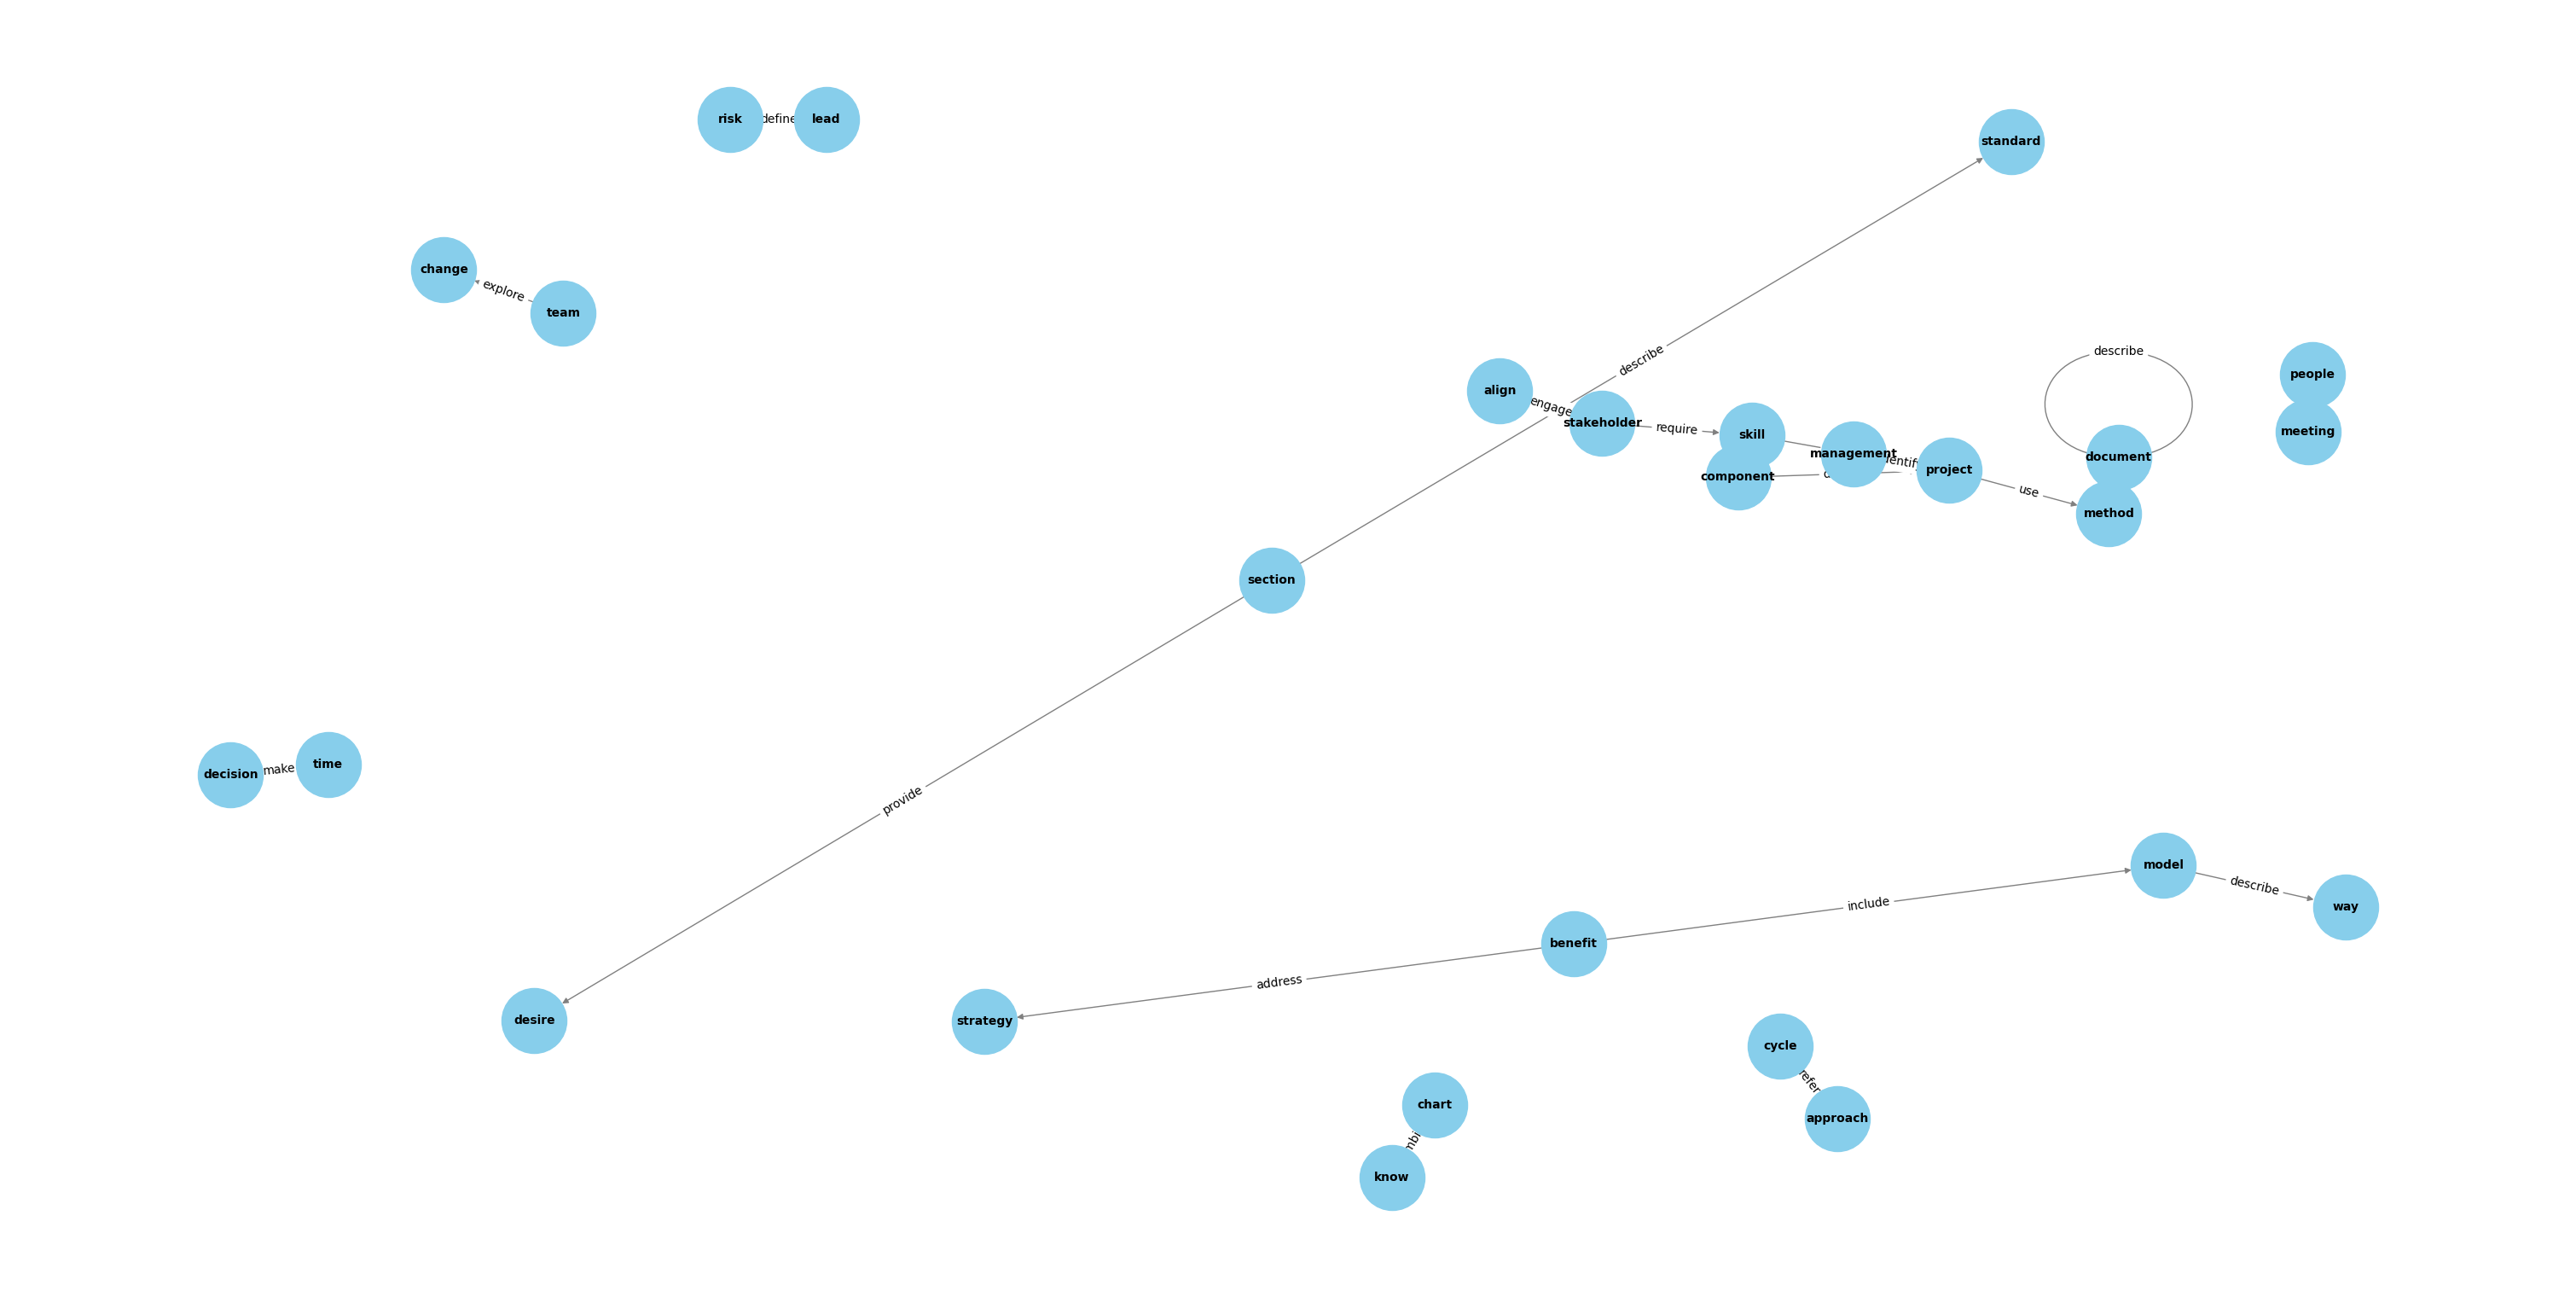

In [101]:
# Step 5b: Construct the knowledge graph using top concepts and filtered relations
knowledge_graph = construct_knowledge_graph(top_concepts, filtered_relations)

# Step 5c: Visualize the knowledge graph
visualize_knowledge_graph(knowledge_graph)

In [12]:
text = raw_text

text = text.lower()
text = re.sub(r'[^a-z\s]', '', text)
doc =nlp(text)

In [15]:
for token in doc:
    print(token.text, token.pos_)


 SPACE
introduction NOUN

 SPACE
the DET
standard NOUN
for ADP
project NOUN
management NOUN
identifies VERB
project NOUN
management NOUN
principles NOUN
that PRON
guide VERB
the DET

 SPACE
behaviors NOUN
and CCONJ
actions NOUN
of ADP
project NOUN
professionals NOUN
and CCONJ
other ADJ
stakeholders NOUN
who PRON
work VERB
on ADP
or CCONJ
are AUX
engaged VERB

 SPACE
with ADP
projects NOUN

 SPACE
this DET
introductory ADJ
section NOUN
describes VERB
the DET
purpose NOUN
of ADP
this DET
standard NOUN
defines VERB
key ADJ
terms NOUN
and CCONJ

 SPACE
concepts NOUN
and CCONJ
identifies VERB
the DET
audience NOUN
for ADP
the DET
standard NOUN

 SPACE
the DET
standard NOUN
for ADP
project NOUN
management NOUN
consists VERB
of ADP
the DET
following VERB
sections NOUN

	
 SPACE
section NOUN
  SPACE
introduction NOUN

	
 SPACE
section NOUN
  SPACE
a DET
system NOUN
for ADP
value NOUN
delivery NOUN

	
 SPACE
section NOUN
  SPACE
project NOUN
management NOUN
principles NOUN

   SPACE
purpose NO

In [13]:
doc[:2000]


introduction
the standard for project management identifies project management principles that guide the 
behaviors and actions of project professionals and other stakeholders who work on or are engaged 
with projects
this introductory section describes the purpose of this standard defines key terms and 
concepts and identifies the audience for the standard
the standard for project management consists of the following sections
	
section  introduction
	
section  a system for value delivery
	
section  project management principles
  purpose of the standard for project management
the standard for project management provides a basis for understanding project management 
and how it enables intended outcomes this standard applies regardless of industry location size 
or delivery approach for example predictive hybrid or adaptive it describes the system within 
which projects operate including governance possible functions the project environment and 
considerations for the relationship betw

In [11]:
doc = nlp(raw_text)

In [12]:
print(len(doc))

107856


In [13]:
doc[0:50]

3
Introduction
The Standard for Project Management identifies project management principles that guide the 
behaviors and actions of project professionals and other stakeholders who work on or are engaged 
with projects.
This introductory section describes the purpose of this standard, defines key terms